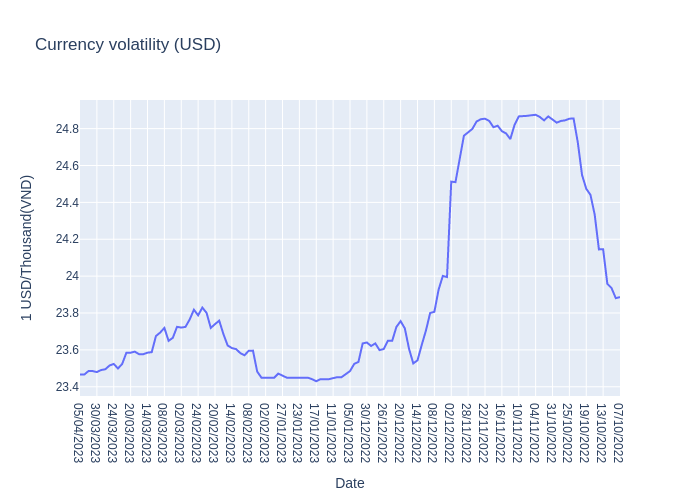

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objs as go

# Define the URL of the webpage
url = 'https://vn.exchange-rates.org/history/VND/USD/T'

# Send a GET request to the webpage and store the response
response = requests.get(url)

# Parse the HTML content of the webpage using BeautifulSoup and the default parser
soup = BeautifulSoup(response.text, 'html.parser')

# Extract data from webstie 
extract_data  = soup.find('table', { "class" : "table table-striped table-hover table-hover-solid-row table-simple history-data"}) 
select_data  = extract_data.find_all('tr')

# all exchange rate 
lst_exchange_rate = []

# all date
lst_date = []
for element in select_data:
    exchange_rate = element.a.get_text()
    lst_exchange_rate.append(exchange_rate)
    date = element.td.get_text()
    lst_date.append(date)
    
# Set data with pandas
df = pd.DataFrame({
    'x': lst_date,
    'y': lst_exchange_rate,
})

# delete the comma on the data for esay to see what different
df['y'] = pd.to_numeric(df['y'].str.replace(',', ''))

# create the line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x'], y=df['y'],mode='lines'))

# customize the chart layout
fig.update_layout(
    title='Currency volatility (USD)',
    xaxis_title='Date',
    yaxis_title='1 USD/Thousand(VND)',
)
# show the plot
fig.show(renderer= 'png')



# Should we reserve foreign currency (USD)?